
## Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D



## Assigning Values

In [ ]:

num_classes=10


## Train Test Split

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
print(len(x_train))
print(len(x_test))

50000
10000


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Visualizing the dataset

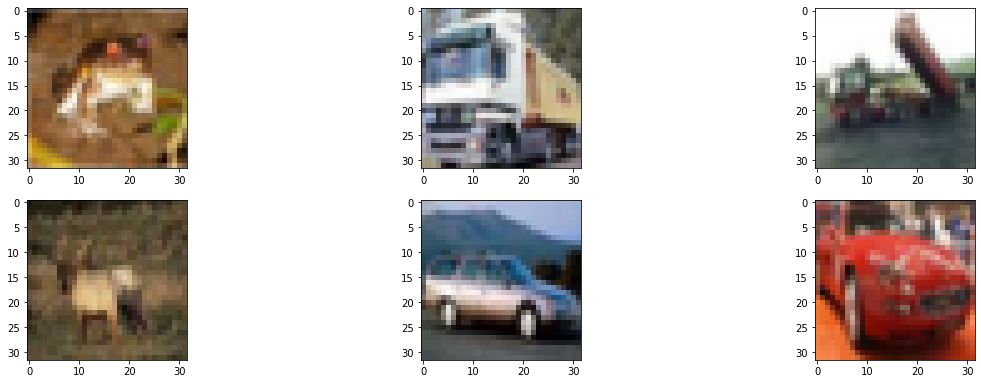

In [ ]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(x_train[i])
plt.show()

## One hot encoding

In [ ]:
# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test,num_classes)


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Initialize the model

In [ ]:
# Initialize the model
model = Sequential()


### Adding layers 

In [ ]:
# Create the model with two 32 convolution filters -> pooling layer -> two 64 conv filters -> pooling layer -> flattening -> fully conncted layer 
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

In [ ]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

In [ ]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

## Adding an Optimizer

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.Adam(learning_rate=1.0e-4)

In [ ]:
# Let's train the model using Adam
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

### Model summary

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_18 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_19 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 64)       

## Train the model

In [ ]:
checkpoint = ModelCheckpoint('best_model_simple.h5',  # model filename
                             monitor='val_loss', # quantity to monitor
                             verbose=0, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made 
                                          # automatically depending on the quantity to monitor

In [ ]:
history=model.fit(x_train, y_train,
              batch_size=128,
              epochs=80,
              validation_data=(x_test, y_test),
          shuffle=True,verbose=1,callbacks=[checkpoint])

Epoch 1/80
391/391 [==============================] - 10s 23ms/step - loss: 1.9178 - accuracy: 0.2950 - val_loss: 1.5941 - val_accuracy: 0.4373
Epoch 2/80
391/391 [==============================] - 9s 22ms/step - loss: 1.5560 - accuracy: 0.4316 - val_loss: 1.4177 - val_accuracy: 0.4898
Epoch 3/80
391/391 [==============================] - 9s 22ms/step - loss: 1.4413 - accuracy: 0.4788 - val_loss: 1.3307 - val_accuracy: 0.5168
Epoch 4/80
391/391 [==============================] - 9s 22ms/step - loss: 1.3742 - accuracy: 0.5052 - val_loss: 1.2666 - val_accuracy: 0.5502
Epoch 5/80
391/391 [==============================] - 9s 22ms/step - loss: 1.3219 - accuracy: 0.5260 - val_loss: 1.2223 - val_accuracy: 0.5647
Epoch 6/80
391/391 [==============================] - 9s 22ms/step - loss: 1.2717 - accuracy: 0.5456 - val_loss: 1.1700 - val_accuracy: 0.5892
Epoch 7/80
391/391 [==============================] - 9s 22ms/step - loss: 1.2286 - accuracy: 0.5627 - val_loss: 1.1390 - val_accuracy: 0.597

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

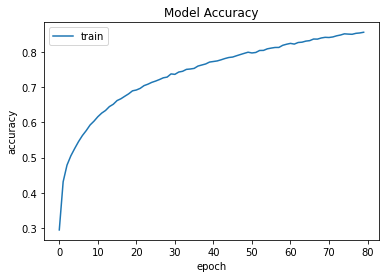

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

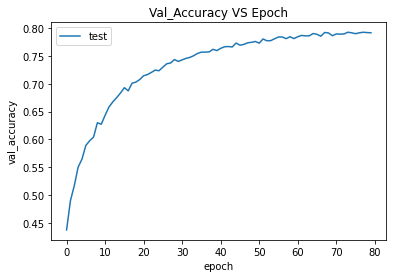

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.title("Val_Accuracy VS Epoch")
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['test'],loc='upper left')
plt.show()

## Evaluation metrics

In [ ]:
_,acc=model.evaluate(x_test,y_test)
print("Accuracy is:%.2f%%"%(acc*100))

313/313 [==============================] - 2s 6ms/step - loss: 0.6139 - accuracy: 0.7918
Accuracy is:79.18%


In [ ]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
image=x_test[0]
pred = model.predict(np.array([image]))
pred1=pred.flatten()
k=dict(zip(classes,pred1))
print(k)


{'airplane': 1.5422294e-05, 'automobile': 0.0014015617, 'bird': 0.0001542751, 'cat': 0.68388957, 'deer': 5.639033e-06, 'dog': 0.30672362, 'frog': 0.007358552, 'horse': 1.9411398e-05, 'ship': 0.0003838364, 'truck': 4.808979e-05}


In [ ]:
all_values=k.values()
max_value=max(all_values)
d={v:k for (v,k) in k.items() if k==max_value}
print(d)

{'cat': 0.68388957}
